<!--# STAT 207: Data Science Exploration-->

# <u>Case Study 12 Notebook</u>: Variable Transformations

This Case Study contains an analysis that provides an approach to address the question: What do you do when your linear model assumptions are not met?

A quick note is that sometimes there might not be anything to do to improve the linear modeling conditions.  That is, there might not be a linear relationship between your variables of interest.  However, before giving up, it can be helpful to explore your variables and possible transformations to attempt to improve the model fit.

In this Case Study, we will attempt to answer:

**Can we build a linear regression model to predict the fuel efficiency (mpg) of a car using the weight of the car?**

<hr style="height:1px;border:none;color:#333;background-color:#333;" />


## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import statsmodels.api as sm
import statsmodels.formula.api as smf

<hr style="height:1px;border:none;color:#333;background-color:#333;" />

## Preparing the Data and Initial Summary Analyses

We will use a random sample of 205 cars that were designed in the 70's and 80's.

In [2]:
df_cars=pd.read_csv('cars.csv', na_values=['?'])
df_cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [3]:
df_cars.shape

(205, 26)

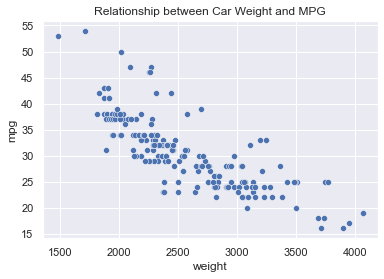

In [4]:
sns.scatterplot(x="weight", y='mpg', data=df_cars)
plt.title('Relationship between Car Weight and MPG')
plt.show()

The relationship between weight and mpg in this dataset is negative, nonlinear, and moderately strong. There do not appear to be any obvious outliers.

Given that this is not a linear relationship, we can already see that one of our linear regression conditions is not going to hold. But, for now, let's fit a regression model predicting mpg with weight and check what other conditions might not be met.

## Initial Model Fitting

In [5]:
car_result = smf.ols('mpg ~ weight', data=df_cars).fit()
car_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     354.6
Date:                Wed, 22 Mar 2023   Prob (F-statistic):           2.01e-46
Time:                        13:03:38   Log-Likelihood:                -582.37
No. Observations:                 205   AIC:                             1169.
Df Residuals:                     203   BIC:                             1175.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     57.7052      1.461     39.508      0.000      54.825      60.585
weight        -0.0105      0.001    -18.831      0.000      -0.012      -0.009
==============================================================================
Omnibus:                       40.427   Durbin-Watson:                   1.510
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.119
Skew:                           1.028   Prob(JB):                     9.79e-16
Kurtosis:                       4.967   Cond. No.                     1.31e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Initial Model Condition Checking 

**<u>Condition 1</u>: Linearity Condition**

The distribution of points in the plot below are NOT roughly evenly distributed above and below the line as we move from left to right, therefore we can NOT say the linearity condition is met.

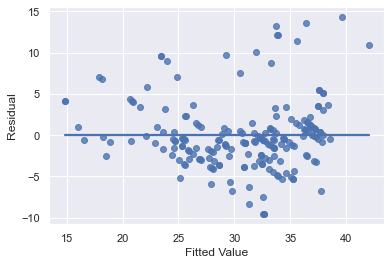

In [6]:
sns.regplot(x=car_result.fittedvalues, y=car_result.resid, ci=None)
plt.ylabel('Residual')
plt.xlabel('Fitted Value')
plt.show()

**<u>Condition 2</u>: Constant Variability of Residuals Condition**

Because the y-axis spread of points in the plot below CHANGES as we move from left to right, thus we can NOT say that this condition is met.

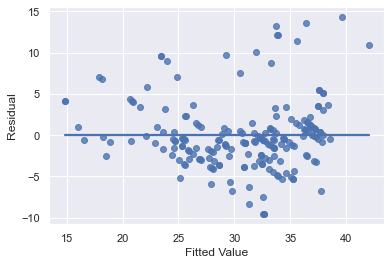

In [7]:
sns.regplot(x=car_result.fittedvalues, y=car_result.resid, ci=None)
plt.ylabel('Residual')
plt.xlabel('Fitted Value')
plt.show()

**<u>Condition 3</u>: Normality of Residuals (with Mean of 0) Condition**

Because the histogram of residuals is slightly skewed to the right, the assumption that the residuals are normally distributed is slightly not met. The graph may be centered a little negative, but it is close to 0.

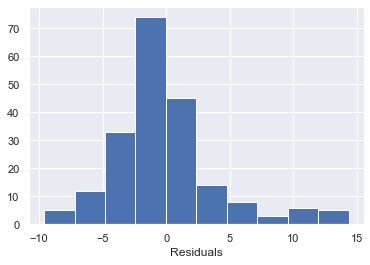

In [8]:
plt.hist(car_result.resid)
plt.xlabel('Residuals')
plt.show()

**<u>Condition 4 </u>Independence of Residuals Condition**

At the very least, we verify that:
* the data is randomly sampled and
* the sample size n=205<10% of all car models from the 70's and 80's

Thus the condition for independence of residuals may not be violated in this particular way.

However, it may still be the case that these residuals are not independent (for other reasons that you will discuss in later statistics classes).

**<u>Condition 5</u>: No Multicollinearity Condition**

This is a simple linear regression model (which only has one explanatory variable), thus we do not need to check this condition.

Thus, because not all of the model conditions are met:
* we cannot say that a linear model is a good fit for this data set,
* and inference we conduct on the population slopes/intercept of this model may be invalid.

**So what can we do?**

## Variable Transformations

We will try transforming some of the variables to see if that improves the conditions for our model.

Let's create a new variable in our df_cars dataframe that takes the natural log of each values in the response variable (mpg).

In [9]:
df_cars['log_mpg']=np.log(df_cars['mpg'])

df_cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,mpg,price,log_mpg
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,3.295837
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,3.295837
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,3.258097
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,3.401197
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,3.091042


### Fitting a Second Model with log_mpg as Response

In [10]:
car_result = smf.ols('log_mpg ~ weight', data=df_cars).fit()
car_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                log_mpg   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     443.4
Date:                Wed, 22 Mar 2023   Prob (F-statistic):           5.97e-53
Time:                        13:03:38   Log-Likelihood:                 134.74
No. Observations:                 205   AIC:                            -265.5
Df Residuals:                     203   BIC:                            -258.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.3130      0.044     97.600      0.000       4.226       4.400
weight        -0.0004   1.69e-05    -21.056      0.000      -0.000      -0.000
==============================================================================
Omnibus:                       16.652   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.963
Skew:                           0.548   Prob(JB):                     1.70e-05
Kurtosis:                       4.171   Cond. No.                     1.31e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Checking Conditions of our Second Model

**<u>Condition 1</u>: Linearity Condition**

The distribution of points in the plot below are now roughly evenly distributed above and below the line as we move from left to right, therefore we can say the linearity condition is met.

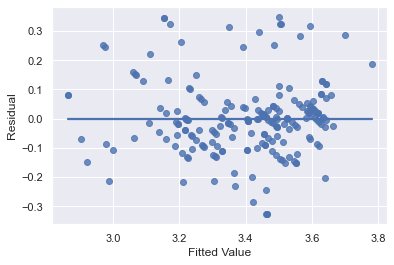

In [11]:
sns.regplot(x=car_result.fittedvalues, y=car_result.resid, ci=None)
plt.ylabel('Residual')
plt.xlabel('Fitted Value')
plt.show()

**<u>Condition 2</u>: Constant Variability of Residuals Condition**

The y-axis spread of points in the plot below as we move from left to right now changes very little, thus we can now say that this condition is met.

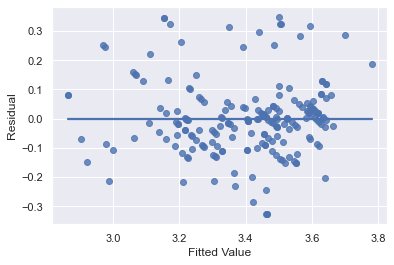

In [12]:
sns.regplot(x=car_result.fittedvalues, y=car_result.resid, ci=None)
plt.ylabel('Residual')
plt.xlabel('Fitted Value')
plt.show()

**<u>Condition 3</u>: Normality of Residuals (with Mean of 0) Condition**

Because the histogram of residuals is symmeric and unimodal and centered at 0, we can assume that the distribution of the residuals is normal with a mean of 0.

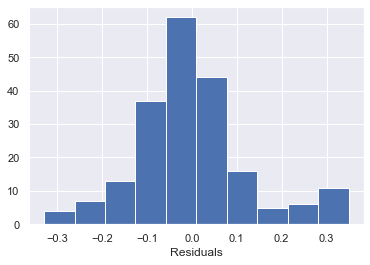

In [13]:
plt.hist(car_result.resid)
plt.xlabel('Residuals')
plt.show()

**<u>Condition 4 </u>Independence of Residuals Condition**

At the very least, we verify that:
* the data is randomly sampled and
* the sample size n=205<10% of all car models from the 70's and 80's

Thus the condition for independence of residuals may not be violated in this particular way.

However, it may still be the case that these residuals are not independent (for other reasons that you will discuss in later statistics classes).

**<u>Condition 5</u>: No Multicollinearity Condition**

This is a simple linear regression model (which only has one explanatory variable), thus we do not need to check this condition.

So, we can now say that the conditions are met when predicting log_mpg with a weight in a simple linear regression model.

## Predictions, Interpretations, (and Inference) Change when You Transform the Model

Be careful to remember that you transformed variables when being asked to do thing with your transformed model.

### Set up your new linear regression equation

In [14]:
car_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                log_mpg   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     443.4
Date:                Wed, 22 Mar 2023   Prob (F-statistic):           5.97e-53
Time:                        13:03:38   Log-Likelihood:                 134.74
No. Observations:                 205   AIC:                            -265.5
Df Residuals:                     203   BIC:                            -258.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.3130      0.044     97.600      0.000       4.226       4.400
weight        -0.0004   1.69e-05    -21.056      0.000      -0.000      -0.000
==============================================================================
Omnibus:                       16.652   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.963
Skew:                           0.548   Prob(JB):                     1.70e-05
Kurtosis:                       4.171   Cond. No.                     1.31e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

It looks like the slope is very small. To minimize rounding issues, let's extract the slope and intercept to get a more accurate (less rounded) estimate for the intercept and slope.

In [15]:
car_result.params

Intercept    4.312959
weight      -0.000357
dtype: float64

$\hat{ln(mpg)}=4.3130-0.0004(weight)$

### Predictions 

Predict the <u>mpg</u> of a 3500 lb car.

$\hat{ln(mpg)}=4.3130-0.000357(3500) = 3.06$

In [16]:
car_result.predict(exog=dict(weight=3500))

0    3.064143
dtype: float64

We have predicted the log of fuel efficiency above.  If we want to use this prediction in the real world, we are likely to be more interested in the fuel efficiency (mpg) on the original scale.

Don't forget to exponentiate both sides of this equation to get the <u>predicted mpg</u> not the <u>predicted ln(mpg)</u>.

$e^{\hat{ln(mpg)}} = e^{3.06}$



In [17]:
np.exp(3.06)

21.327557162026903

$\hat{mpg} = 21.33$

### Interpretations

Interpret your intercept and slope of your model in words

* <u>Intercept</u>: We would expect a car that is 0 lbs, on average, to have a ln(mpg) of 4.3130. (This is a nonsensical answer, as a car cannot be 0 lbs).

* <u>Slope</u>: If we were to increase the weight of a car by 1 lb, we would expect the ln(mpg) of the car to decrease, on average, by 0.000357.

### Inference

Although we won't discuss this in detail, keep in mind that our inference procedures are now using a model that predicts the <u>ln(mpg)</u> and not the <u>mpg</u> on the original scale.

Similar to the interpretations above, we want to consider this adjustment as we make statements about the underlying population.

---
STAT 207, Julie Deeke, Victoria Ellison, and Douglas Simpson, University of Illinois at Urbana-Champaign